# Dataset과 DataLoader

- Dataset 불러오기
- root : 학습/테스트 데이터가 저장되는 경로
- train : 학습용 또는 테스트용 데이터셋 여부 지정
- download = True root에 데이터가 없는 경우 인터넷에서 다운로드
- transform과 target_transform은 특징(feature)과 정답(label) 변형(transform)을 지정

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)



  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



# 데이터셋을 순회하고 시각화하기
- Dataset에 리스트(list)처럼 직접 접근(index) 할 수 있음
- training_data[index], matplotlib을 사용해 학습 데이터 일부 시각화 가능

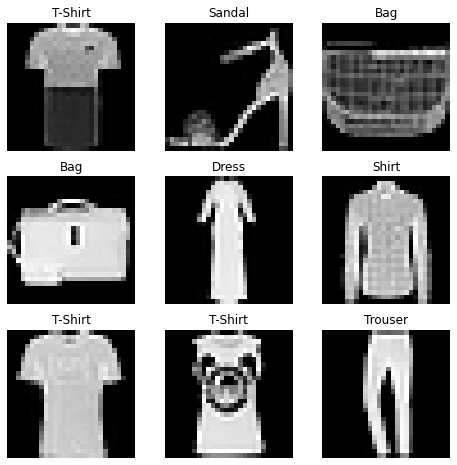

In [2]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize = (8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(training_data), size=(1,)).item()
  img, label = training_data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap = "gray")
plt.show()

# 파일에서 사용자 정의 데이터셋 만들기
- 사용자 정의 Dataset 클래스는 반드시 3개 함수를 구현 해야한다


## __init__
- Dataset 객체가 생성(instance)될 때 한 번만 실행된다
- annotations과 img_dir 두 가지를 초기화 한다

## __len__
- 데이터 셋의 샘플 개수를 반환

## __getitem__
- 주어진 인덱스 idx에 해당하는 데이터셋에서 불러오고 반환
- 인덱스를 기반으로, 디스크에서 이미지의 위치를 식별
- read_image를 사용하여 이미지를 텐서로 변환
- self.img_labels의 csv 데이터로부터 해당하는 정답 label를 가져오고, 해당하는 경우 변형 함수 호출 뒤에 텐서 이미지와 라벨을 Python 사전 형태로 변환

In [7]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform = None, target_transform = None):
    self.img_labels = pd.read_csv(annotations_file, names = ["file_name", 'label'])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
      return len(self.img_labels)

  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)

    return image, label

# Data Loader를 통해 반복하기
-  데이터셋을 불러온 뒤에는 필요에 따라 반복이 가능
-  아래의 각 iteration에는 train_features와 train_labels의 묶음(batch)를 반환한다

In [17]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


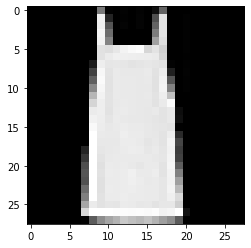

Label: 3


In [20]:
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print("Feature batch shape: {}".format(train_features.size()))
print("Labels batch shape: {}".format(train_labels.size()))
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print("Label: {}".format(label))